In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv('/home/jatin/devel/jupyter/dataset/Altman_Z_2D.csv')
data.head(5)

,Bankrupt,EBIT/Total Assets,MktValEquity/Debt
0,False,27.693875,8.415582
1,False,-14.302305,8.878080
2,True,-20.515623,-8.742365
3,False,29.729424,4.878042
4,False,32.856383,1.107730


In [20]:
data.describe
data.columns
bankrupt_mask = data['Bankrupt']==True


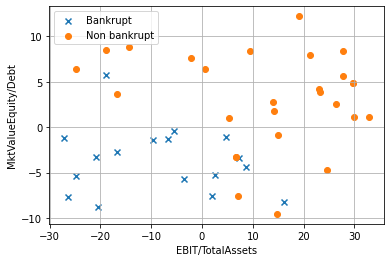

In [22]:
bankrupt_mask
# Plot the bankrupt points
plt.scatter(data['EBIT/Total Assets'][bankrupt_mask], data['MktValEquity/Debt'][bankrupt_mask], marker='x')
# Plot the non-bankrupt points
plt.scatter(data['EBIT/Total Assets'][~bankrupt_mask], data['MktValEquity/Debt'][~bankrupt_mask], marker='o')
# Formatting
plt.xlabel('EBIT/TotalAssets')
plt.ylabel('MktValueEquity/Debt')
plt.grid()
plt.legend(['Bankrupt', 'Non bankrupt'])

In [30]:
print(data.columns)

Index(['Bankrupt', 'EBIT/Total Assets', 'MktValEquity/Debt'], dtype='object')


In [41]:
X = data[['EBIT/Total Assets', 'MktValEquity/Debt']]
Y = data['Bankrupt']
from sklearn.tree import DecisionTreeClassifier
# create a decision tree classifier object first
tree_clf = DecisionTreeClassifier(max_depth=2)
# Fit the decision tree to our training data of X and Y
tree_clf.fit(X,Y)
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=2, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                       random_state=None, splitter='best')
# presort='deprecated',
print('Low EBIT/TotalAssets and MktValueEquity/Debt company go bust?', tree_clf.predict([[-20, -10], [-15, -2]]))
print('High EBIT/TotalAssets and MktValueEquity/Debt company go bust?', tree_clf.predict([[20, 10]]))

Low EBIT/TotalAssets and MktValueEquity/Debt company go bust? [ True  True]
High EBIT/TotalAssets and MktValueEquity/Debt company go bust? [False]


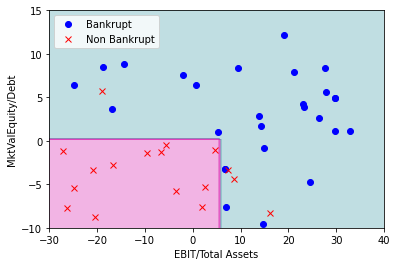

In [38]:
# Contour Plot
from matplotlib.colors import ListedColormap
x1s = np.linspace(-30, 40, 100)
x2s = np.linspace(-10, 15, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).astype(int).reshape(x1.shape)
custom_cmap = ListedColormap(['#2F939F', '#D609A8'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
plt.plot(X['EBIT/Total Assets'][Y==False], X['MktValEquity/Debt'][Y==False], "bo", X['EBIT/Total Assets'][Y==True],
        X['MktValEquity/Debt'][Y==True], "rx")
plt.xlabel('EBIT/Total Assets')
plt.ylabel('MktValEquity/Debt')
plt.legend(['Bankrupt', 'Non Bankrupt'])

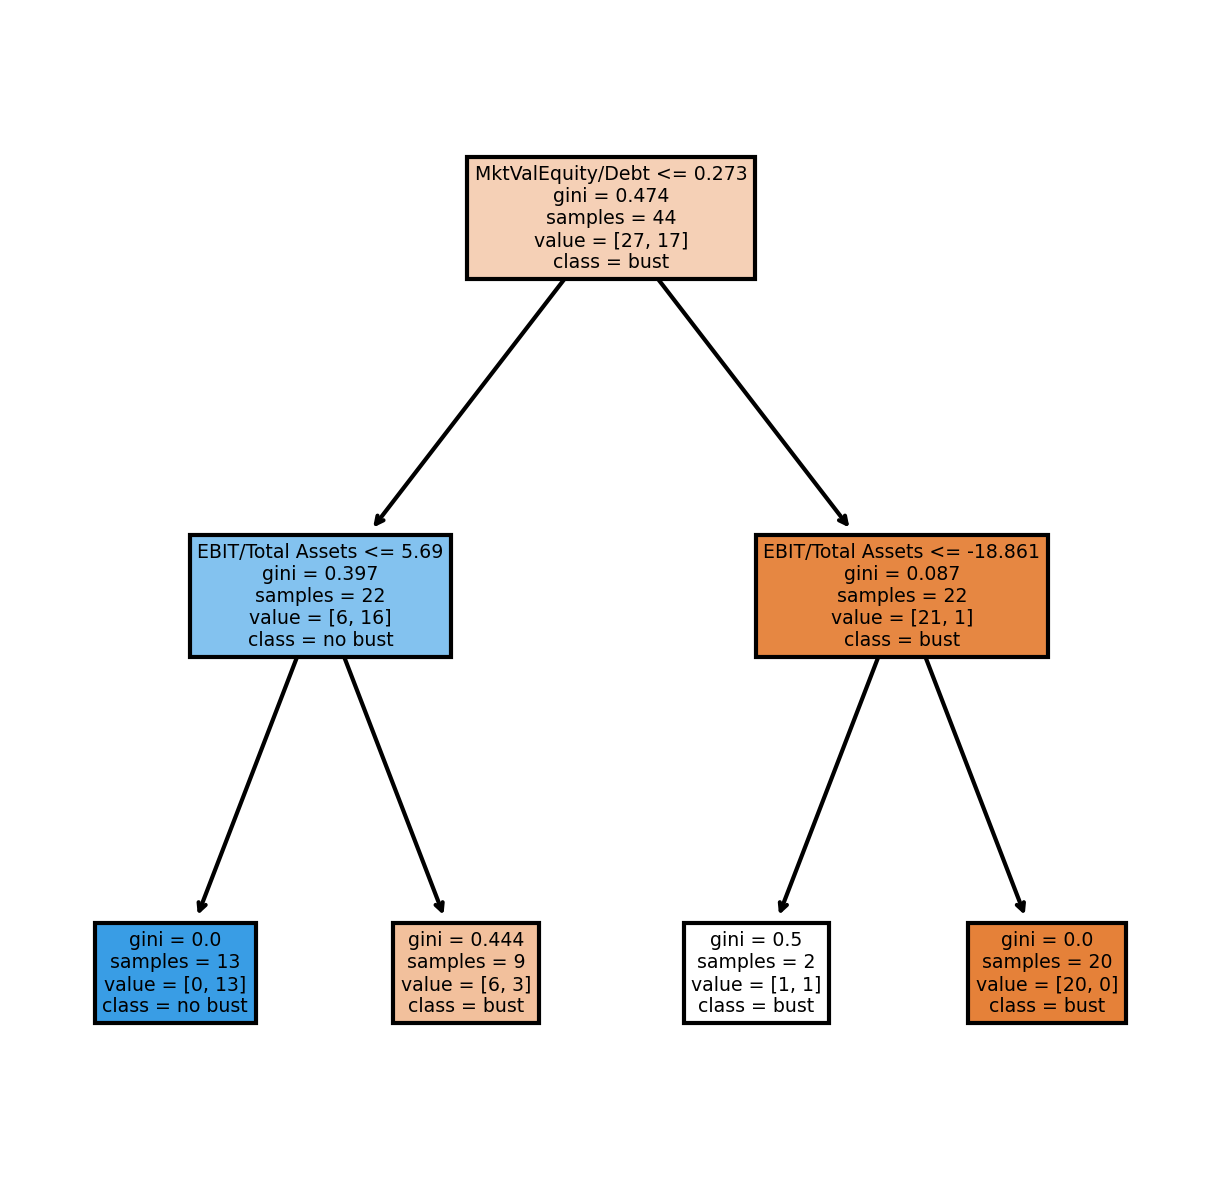

In [40]:
from sklearn import tree
plt.figure(figsize=(5,5),dpi=300)
tree.plot_tree(tree_clf, 
               feature_names=['EBIT/Total Assets', 'MktValEquity/Debt'],
               class_names=['bust', 'no bust'],
               filled=True);